In [1]:
import sys, pickle, glob
sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt
from visualization import plot_mean_std

In [2]:
disruption_modes = ['landscape', 'memory', 'rand']
case_names = ['without\nmemory modes', 'without top 15\nlandscape modes', 
              'without top 15\nother modes']

In [3]:
fname_template = r'../results/EIrec_J_disr_RL_shuffleAll_%s_%s.pkl'

song_examples = {dm: [] for dm in disruption_modes}
ve_rate = {dm: [] for dm in disruption_modes}
advantage = {dm: [] for dm in disruption_modes}

for dm in disruption_modes:
    fnames = glob.glob(fname_template % ('*', dm))
    print(len(fnames))
    for i, fname in enumerate(fnames):
        with open(fname, 'rb') as f:
            res = pickle.load(f)
        song_examples[dm].append(res['songs'])
        ve_rate[dm].append(np.stack(res['ve_rate'], 0))
        advantage[dm].append(np.stack(res['advantage'], 0))
    ve_rate[dm] = np.stack(ve_rate[dm], 0)
    advantage[dm] = np.stack(advantage[dm], 0)
    song_examples[dm] = np.stack(song_examples[dm], 0)

12
12
12


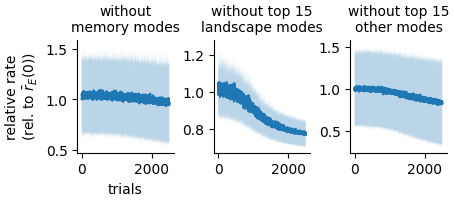

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(4.5,2))#, sharey='all')
for i, dm in enumerate(disruption_modes):
    r = ve_rate[dm] / ve_rate[dm][:,0].mean(axis=0)
    r_mean, r_std = r.mean(axis=0), r.std(axis=0)
    f = np.ones(1) / 1
    ax[i].plot(r_mean)
    ax[i].fill_between(np.linspace(0, len(r_mean), len(r_mean)),
                       r_mean + r_std, r_mean - r_std, 
                       alpha=0.3)
    # ax[i].plot(r.T, lw=1)
    ax[i].set(title=case_names[i])
ax[0].set(ylabel='relative rate\n(rel. to $\\bar{r}_E(0)$)', xlabel='trials')
fig.savefig('../svg/supplementary/J_disr_RL_mean_rate.svg')

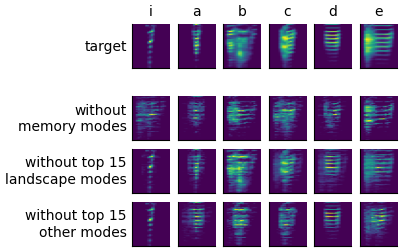

In [5]:
n_syl = song_examples['landscape'][0].shape[0]
fig, ax = plt.subplots(4, n_syl, figsize=(4,2.5))
for i, dm in enumerate(disruption_modes):
    for j, t in enumerate('iabcde'):
        # ax[i+1,j].imshow(song_examples[dm][0][j])
        # s = np.mean(song_examples[dm], axis=0)
        s = np.median(song_examples[dm], axis=0)
        ax[i+1,j].imshow(s[j])
        ax[i+1,j].set(xticks=[], yticks=[])
    ax[i+1,0].set_ylabel(case_names[i], rotation=0, ha='right', va='center')
adult = dict(np.load('../adult_songs/data.npz'))
for j, t in enumerate('iabcde'):
    ax[0,j].imshow(adult['spec_syl'][:,j].mean(axis=0))
    ax[0,j].set(title=t, xticks=[], yticks=[])
    # ax[-1,j].set_axis_off()
ax[0,0].set_ylabel('target', rotation=0, ha='right', va='center')
ax[1,0].set(title=' ')
fig.savefig('../svg/supplementary/J_disr_RL_syl_gen.svg')